#Principal Component Analysis

###A gentle introduction to Principal Component Analysis and it's implementation in Python.

Jan 31, 2017 by Praneeth Kandula

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer= load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
data = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [7]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [107]:
scaled_data = data.apply(lambda x: (x - np.mean(x)) / np.std(x))
scaled_data = pd.DataFrame(scaled_data)


In [108]:
scaled_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [85]:
from sklearn.decomposition import PCA

In [86]:
pca = PCA(n_components=2)

In [154]:
twocomp = pca.fit_transform(scaled_data)

In [155]:
twocomp.shape

(569, 2)

In [156]:
twocomp

array([[  9.19283683,   1.94858307],
       [  2.3878018 ,  -3.76817174],
       [  5.73389628,  -1.0751738 ],
       ..., 
       [  1.25617928,  -1.90229671],
       [ 10.37479406,   1.67201011],
       [ -5.4752433 ,  -0.67063679]])

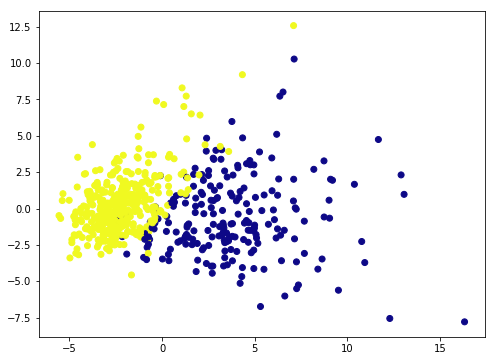

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(twocomp[:,0],twocomp[:,1],c=cancer['target'],cmap="plasma")

In [157]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

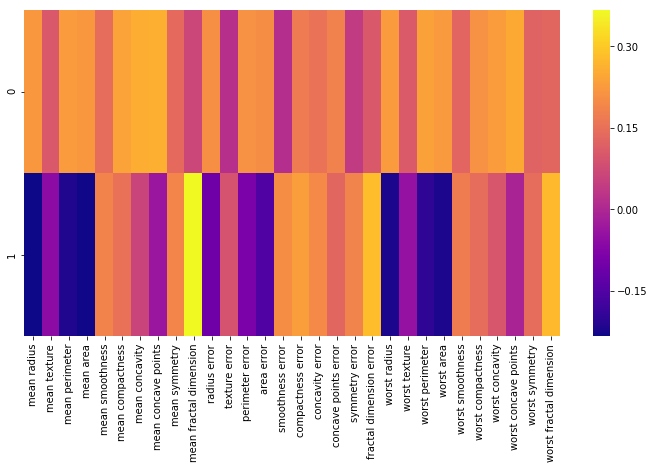

In [158]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.DataFrame(pca.components_,columns=cancer['feature_names']),cmap="plasma")

In [162]:
pcamany = PCA()

In [166]:
pcadata = pcamany.fit_transform(scaled_data)
pcadata

array([[  9.19283683e+00,   1.94858307e+00,  -1.12316616e+00, ...,
         -3.39144536e-02,   4.56477199e-02,  -4.71692081e-02],
       [  2.38780180e+00,  -3.76817174e+00,  -5.29292687e-01, ...,
          3.26241827e-02,  -5.68742432e-03,  -1.86787626e-03],
       [  5.73389628e+00,  -1.07517380e+00,  -5.51747593e-01, ...,
          4.70258247e-02,   3.14589659e-03,   7.50534755e-04],
       ..., 
       [  1.25617928e+00,  -1.90229671e+00,   5.62730526e-01, ...,
         -2.57775589e-03,   6.70621179e-03,   3.77041667e-03],
       [  1.03747941e+01,   1.67201011e+00,  -1.87702933e+00, ...,
         -6.80863833e-02,  -8.41632764e-02,  -2.37828222e-02],
       [ -5.47524330e+00,  -6.70636791e-01,   1.49044308e+00, ...,
         -9.51587894e-03,  -6.09131090e-02,  -1.94755854e-02]])

In [164]:
pcamany.explained_variance_ratio_

array([  4.42720256e-01,   1.89711820e-01,   9.39316326e-02,
         6.60213492e-02,   5.49576849e-02,   4.02452204e-02,
         2.25073371e-02,   1.58872380e-02,   1.38964937e-02,
         1.16897819e-02,   9.79718988e-03,   8.70537901e-03,
         8.04524987e-03,   5.23365745e-03,   3.13783217e-03,
         2.66209337e-03,   1.97996793e-03,   1.75395945e-03,
         1.64925306e-03,   1.03864675e-03,   9.99096464e-04,
         9.14646751e-04,   8.11361259e-04,   6.01833567e-04,
         5.16042379e-04,   2.72587995e-04,   2.30015463e-04,
         5.29779290e-05,   2.49601032e-05,   4.43482743e-06])

Text(0,0.5,'% Variance Explained')

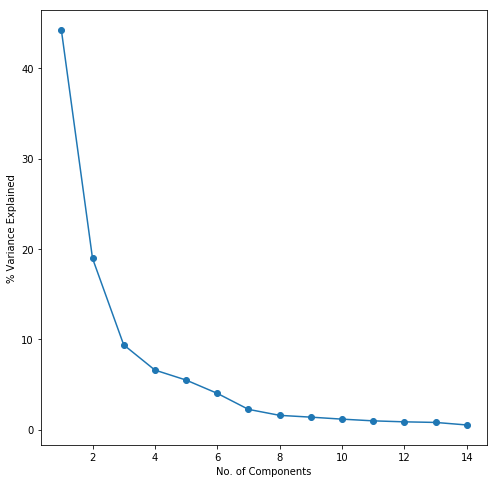

In [165]:
plt.figure(figsize=(8,8))
plt.scatter(range(1,15),pcamany.explained_variance_ratio_[0:14]*100)
plt.plot(range(1,15),pcamany.explained_variance_ratio_[0:14]*100)
plt.xlabel("No. of Components")
plt.ylabel("% Variance Explained")

Text(0,0.5,'Cumulative % Variance Explained')

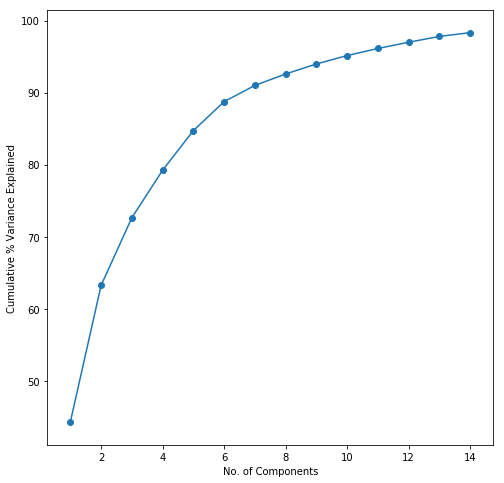

In [151]:
plt.figure(figsize=(8,8))
plt.plot(range(1,15),np.cumsum(pcamany.explained_variance_ratio_[0:14]*100))
plt.scatter(range(1,15),np.cumsum(pcamany.explained_variance_ratio_[0:14]*100))
plt.xlabel("No. of Components")
plt.ylabel("Cumulative % Variance Explained")

In [142]:
pcamany.explained_variance_ratio_


array([  4.42720256e-01,   1.89711820e-01,   9.39316326e-02,
         6.60213492e-02,   5.49576849e-02,   4.02452204e-02,
         2.25073371e-02,   1.58872380e-02,   1.38964937e-02,
         1.16897819e-02,   9.79718988e-03,   8.70537901e-03,
         8.04524987e-03,   5.23365745e-03,   3.13783217e-03,
         2.66209337e-03,   1.97996793e-03,   1.75395945e-03,
         1.64925306e-03,   1.03864675e-03,   9.99096464e-04,
         9.14646751e-04,   8.11361259e-04,   6.01833567e-04,
         5.16042379e-04,   2.72587995e-04,   2.30015463e-04,
         5.29779290e-05,   2.49601032e-05,   4.43482743e-06])

In [186]:
#Principal Component Regression
#We'll be using the Boston housing Data from UCI ML repository

housing = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                        sep="\t",header=None,delim_whitespace=True,names=["CRIM", "ZN", "INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])

housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [187]:
housing.shape

(506, 14)

In [231]:
#Scale the housing data so that each column has mean zero and SD=1.

def normalize(x):
    return((x - np.mean(x)) / np.std(x))

housing_scaled = housing.apply(normalize)
housing_scaled.head()
    


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [230]:
housing_scaled.apply(np.std)

CRIM       1.0
ZN         1.0
INDUS      1.0
CHAS       1.0
NOX        1.0
RM         1.0
AGE        1.0
DIS        1.0
RAD        1.0
TAX        1.0
PTRATIO    1.0
B          1.0
LSTAT      1.0
MEDV       1.0
dtype: float64

In [232]:
X = housing_scaled.iloc[:,0:13]
y = housing_scaled.iloc[:,13]

In [233]:
#First let's split the data into train and test sets.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=99)

In [372]:
#Apply PCA
from sklearn.decomposition import PCA
pcahousing = PCA()
pcatrain = pcahousing.fit_transform(X_train)
pcatrain.shape

(379, 13)

In [373]:
pcatrain[:,:7]

array([[-1.36367147, -0.34343329, -1.26208609, ..., -0.53975227,
        -0.42099109,  0.40691347],
       [-2.03857061,  0.04487133, -0.27394067, ..., -0.50327708,
        -0.01674018,  0.16151606],
       [-0.27548722, -0.62254689, -1.00948906, ...,  1.70904113,
         0.02071398,  0.54497996],
       ..., 
       [-1.31548017, -0.98532509, -0.60327504, ..., -0.37132439,
        -0.44685011,  0.88433707],
       [-0.86062599, -0.78216476, -0.87692405, ..., -0.47115714,
        -0.25568122,  0.46429454],
       [ 1.76699775, -1.32519893, -1.34328377, ...,  0.10113009,
         0.18333194, -0.39737472]])

In [288]:
#Perform 10-fold Cross Validation
from sklearn import cross_validation
kf_10 = cross_validation.KFold(n=len(pcatrain),n_folds=10,shuffle=True,random_state=1)
mse = []

In [289]:
#Import Linear Regression which will be applied to the principal components
from sklearn.linear_model import LinearRegression
regr= LinearRegression()

In [290]:
#MSE with only Intercept.
score = -1*cross_validation.cross_val_score(regr,np.ones((len(pcatrain),1)),y_train,cv=kf_10,scoring="neg_mean_squared_error")
mse.append(score)

In [291]:
#MSE adding one principal component at a time.
for i in np.arange(1,13):
    score = -1*cross_validation.cross_val_score(regr,pcatrain[:,:i],y_train,cv=kf_10,scoring="neg_mean_squared_error")
    mse.append(score)
    


In [315]:
mse[:][12]

array([ 0.43291558,  0.18007211,  0.34645133,  0.1399156 ,  0.18706797,
        0.26102813,  0.21392261,  0.33105042,  0.3417343 ,  0.24544556])

In [317]:
mse

[array([ 1.52931379,  0.57048121,  0.91139389,  0.82577324,  0.48214676,
         0.90708483,  0.74718677,  1.04534931,  1.36939184,  1.32083466]),
 array([ 1.09584534,  0.53227917,  0.73875924,  0.39583691,  0.25575628,
         0.68893645,  0.39823303,  0.45576284,  0.86532944,  0.79122326]),
 array([ 1.05544424,  0.48280762,  0.66865859,  0.36370943,  0.26591934,
         0.65668521,  0.40324905,  0.4508278 ,  0.83946599,  0.76543272]),
 array([ 0.58418565,  0.2146347 ,  0.43810009,  0.13691526,  0.22213133,
         0.33037589,  0.28167281,  0.32037164,  0.40598713,  0.31528151]),
 array([ 0.57714577,  0.21673579,  0.41621125,  0.13072525,  0.21721232,
         0.30950284,  0.27267681,  0.32636887,  0.4296161 ,  0.35874105]),
 array([ 0.55508457,  0.14829651,  0.45088531,  0.11106856,  0.23222894,
         0.27289989,  0.22822353,  0.31025271,  0.39473551,  0.29163241]),
 array([ 0.5348024 ,  0.14396685,  0.44353573,  0.11844813,  0.26890562,
         0.27291664,  0.20802946,  0.29

In [332]:
msearray = np.array(mse)
msearray

array([[ 1.52931379,  0.57048121,  0.91139389,  0.82577324,  0.48214676,
         0.90708483,  0.74718677,  1.04534931,  1.36939184,  1.32083466],
       [ 1.09584534,  0.53227917,  0.73875924,  0.39583691,  0.25575628,
         0.68893645,  0.39823303,  0.45576284,  0.86532944,  0.79122326],
       [ 1.05544424,  0.48280762,  0.66865859,  0.36370943,  0.26591934,
         0.65668521,  0.40324905,  0.4508278 ,  0.83946599,  0.76543272],
       [ 0.58418565,  0.2146347 ,  0.43810009,  0.13691526,  0.22213133,
         0.33037589,  0.28167281,  0.32037164,  0.40598713,  0.31528151],
       [ 0.57714577,  0.21673579,  0.41621125,  0.13072525,  0.21721232,
         0.30950284,  0.27267681,  0.32636887,  0.4296161 ,  0.35874105],
       [ 0.55508457,  0.14829651,  0.45088531,  0.11106856,  0.23222894,
         0.27289989,  0.22822353,  0.31025271,  0.39473551,  0.29163241],
       [ 0.5348024 ,  0.14396685,  0.44353573,  0.11844813,  0.26890562,
         0.27291664,  0.20802946,  0.2947437 

In [342]:
ar= [] 
for i in msearray:
    ar.append(i[0])

In [343]:
ar

[1.5293137928088276,
 1.0958453417963832,
 1.0554442372542214,
 0.5841856494742711,
 0.57714576620034774,
 0.55508456982420062,
 0.53480239895631554,
 0.53194890870720135,
 0.51779483212878485,
 0.51651003948377683,
 0.47711441674365779,
 0.47692724866741559,
 0.43291557729370522]

Text(0,0.5,'MSE')

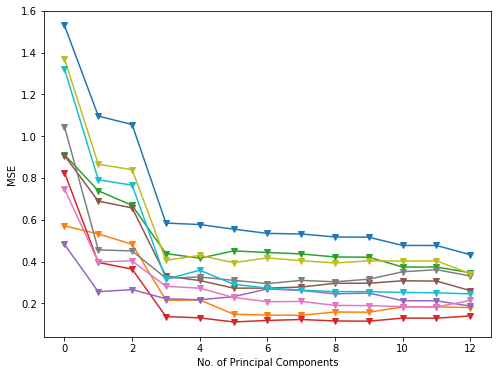

In [345]:
plt.figure(figsize=(8,6))
plt.plot(np.array(mse),'-v')
plt.xlabel("No. of Principal Components")
plt.ylabel("MSE")
#We see that the lowest MSE occurs at M=6.

In [374]:
# Use the Principal Components of the PCA from the training set to transform the
# test set into the same subspace.
pcatest = pcahousing.transform(X_test)
pcatest.shape


(127, 13)

In [375]:
pcatest

array([[-3.03888956, -0.04529808,  0.85388495, ...,  0.12106068,
        -0.09422384, -0.29951903],
       [-2.27418124, -1.0222722 ,  2.34027595, ..., -0.45309656,
         0.12572687, -0.00656935],
       [-2.80170791,  1.22146545, -0.61150716, ..., -0.07026135,
         0.48782091, -0.03306266],
       ..., 
       [-4.2608295 ,  2.362966  ,  0.57232922, ..., -0.53260689,
        -0.28069203,  0.45797288],
       [-0.18495816, -1.26712342, -0.50153417, ...,  0.15196855,
        -0.20824452, -0.04447908],
       [ 1.69838933, -2.56509122,  2.6010791 , ..., -0.58086247,
         1.22418734,  0.29989185]])

In [376]:
from sklearn.metrics import mean_squared_error
regr = LinearRegression()
testmse = []

In [377]:
for i in np.arange(1,13):
    regr.fit(pcatrain[:,:i],y_train)
    pred = regr.predict(pcatest[:,:i])
    testmse.append(mean_squared_error(y_test,pred))

In [378]:
testmse
#As we can see MSE on test set is lowest for M=6 and then starts increasing again. 

[0.68754364147924119,
 0.67037108900301345,
 0.45676107758954015,
 0.44141183208554979,
 0.38288123369857757,
 0.36478713035616667,
 0.3678446587792597,
 0.37111908169870322,
 0.37193576182643118,
 0.38601845105689436,
 0.38680205528028444,
 0.35304433482445829]